In [89]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import imutils
import matplotlib.image as mpimg

In [22]:
import tensorflow as tf

In [23]:
gpu = tf.config.experimental.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(gpu[0],True)

In [24]:
data = np.load("D:/Study/GreatLearning/7.ComputerVision/Project/images.npy")

In [25]:
data.shape

(4750, 128, 128, 3)

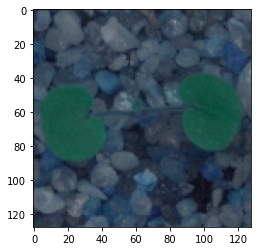

In [26]:
plt.imshow(data[0])

In [27]:
#data = data/255.0

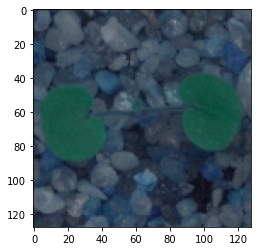

In [28]:
plt.imshow(data[0])

In [29]:
data.shape

(4750, 128, 128, 3)

In [30]:
data[0].shape

(128, 128, 3)

In [31]:
#blur = np.empty(data.shape)

In [32]:
#blur.shape

In [95]:
for i, img in enumerate(data):
    blur = cv2.GaussianBlur(img, (3, 3), 0)
    trim = cv2.threshold(blur, 45,255,cv2.THRESH_BINARY)[1]
    trim = cv2.erode(trim, None, iterations=2)
    trim = cv2.dilate(trim, None, iterations=1)
    cntr = cv2.findContours(trim.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cntr = imutils.grab_contours(cntr)
    c = max(cntr, key=cv2.contourArea)
    pn_l = tuple(c[c[:,:,0].argmin()][0])
    pn_r = tuple(c[c[:,:,0].argmax()][0])
    pn_t = tuple(c[c[:,:,1].argmin()][0])
    pn_b = tuple(c[c[:,:,1].argmax()][0])
    data[i] = image[pn_t[1]:pn_b[1], pn_l[0]:pn_r[0]]
    

error: OpenCV(4.5.0) D:\Softwares\opencv\opencv-4.5.0\modules\imgproc\src\contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


In [92]:
from skimage import color
def crop_contour_img(image, plot=False):
    gray = color.rgb2gray(image)
    gray = cv2.GaussianBlur(gray, (5,5), 0)
    
    trim = cv2.threshold(gray, 45,255,cv2.THRESH_BINARY)[1]
    trim = cv2.erode(trim, None, iterations=2)
    trim = cv2.dilate(trim, None, iterations=1)
    
    cntr = cv2.findContours(trim.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cntr = imutils.grab_contours(cntr)
    c = max(cntr, key=cv2.contourArea)
    
    pn_l = tuple(c[c[:,:,0].argmin()][0])
    pn_r = tuple(c[c[:,:,0].argmax()][0])
    pn_t = tuple(c[c[:,:,1].argmin()][0])
    pn_b = tuple(c[c[:,:,1].argmax()][0])
    
    new = image[pn_t[1]:pn_b[1], pn_l[0]:pn_r[0]]
    
    if plot:
        plt.figure()
        plt.subplot(1,2,1)
        plt.imshow(image)
        plt.tick_params(axis="both",which="both",
                        top = False, bottom = False, left = False, right=False,labelbottom = False,labeltop = False, labelleft = False, labelright = False)
        plt.title('Original')
        
        plt.subplot(1,2,2)
        plt.imshow(new)
        plt.tick_params(axis="both",which="both",
                        top = False, bottom = False, left = False, right=False,labelbottom = False,labeltop = False, labelleft = False, labelright = False)
        plt.title("Cropped")
        plt.show
        
        return new
        

In [93]:
crop_contour_img(data[1000],plot=True)

error: OpenCV(4.5.0) D:\Softwares\opencv\opencv-4.5.0\modules\imgproc\src\contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


In [84]:
new=[]
for i in range(len(data)):
    img = data[i]
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5,5), 0)
    
    trim = cv2.threshold(gray, 45,255,cv2.THRESH_BINARY)[1]
    trim = cv2.erode(trim, None, iterations=2)
    trim = cv2.dilate(trim, None, iterations=1)
    
    cntr = cv2.findContours(trim.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cntr = imutils.grab_contours(cntr)
    c = max(cntr, key=cv2.contourArea)
    
    pn_l = tuple(c[c[:,:,0].argmin()][0])
    pn_r = tuple(c[c[:,:,0].argmax()][0])
    pn_t = tuple(c[c[:,:,1].argmin()][0])
    pn_b = tuple(c[c[:,:,1].argmax()][0])
    
    new.append(img[pn_t[1]:pn_b[1], pn_l[0]:pn_r[0]])
    new1 = np.array(new)
     

<ipython-input-84-eb79fbd30740>:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  new1 = np.array(new)


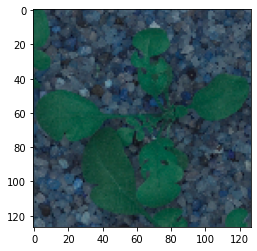

In [85]:
plt.imshow(new1[1000])

In [86]:
new1.shape

(4750,)

In [65]:
labels = pd.read_csv("Labels.csv")

In [66]:
labels.value_counts()

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
dtype: int64

In [67]:
labels.iloc[0,:]

Label    Small-flowered Cranesbill
Name: 0, dtype: object

Text(0.5, 1.0, 'Charlock')

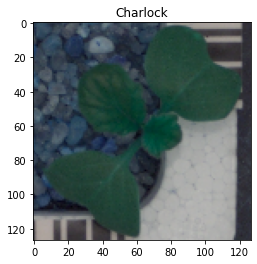

In [70]:
plt.imshow(new[2336])
plt.title(labels.iloc[2336,0])

Text(0.5, 1.0, 'Shepherds Purse')

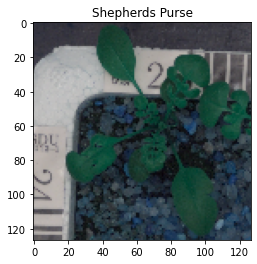

In [71]:
plt.imshow(new[1002])
plt.title(labels.iloc[1002,0])

In [72]:
from sklearn.preprocessing import LabelEncoder

In [73]:
le = LabelEncoder()

In [74]:
labels_le = le.fit_transform(labels)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [75]:
labels_le

array([10, 10, 10, ...,  6,  6,  6])

In [76]:
le.classes_

array(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet'], dtype=object)

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
#blur_array = np.array(blur)

In [79]:
#blur_array.shape

In [80]:
xtr, xts, ytr, yts = train_test_split(new, labels_le, test_size=0.2, stratify=labels_le)

In [81]:
yts.shape

(950,)

In [87]:
from functools import partial
from tensorflow import keras

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=32, kernel_size=7, input_shape=(28,28,3)),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=32),
    DefaultConv2D(filters=32),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=10),
    DefaultConv2D(filters=5),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=60, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=30, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=12, activation='softmax'),
])

In [88]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(xtr, ytr, batch_size=50,epochs=1000, validation_split=0.2, callbacks=tf.keras.callbacks.EarlyStopping(patience=10))

ValueError: Data cardinality is ambiguous:
  x sizes: 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 72, 101, 101, 101, 86, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 88, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 97, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 72, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 99, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 50, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 100, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 91, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 94, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 100, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 94, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 99, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 79, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 98, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 5, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 92, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 70, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 100, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 72, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 99, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 59, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 81, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 66, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 84, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 68, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 100, 101, 101, 101, 101, 101, 34, 101, 101, 101, 101, 91, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 75, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 79, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 75, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 57, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 90, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 96, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 93, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 97, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 95, 101, 64, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 100, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 75, 101, 94, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 80, 101, 101, 101, 101, 101, 96, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 100, 101, 101, 101, 101, 101, 101, 101, 101, 101, 90, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 84, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 90, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 98, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 76, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 65, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 77, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 82, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 100, 58, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 99, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 92, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 95, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 85, 101, 92, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 99, 101, 101, 101, 101, 101, 91, 101, 101, 101, 101, 101, 101, 92, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 73, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 97, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 64, 72, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 75, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 68, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101
  y sizes: 101
Make sure all arrays contain the same number of samples.

In [65]:
model.evaluate(xts,yts)

30/30 [==============================] - 0s 9ms/step - loss: 2.4158 - accuracy: 0.1379


[2.4158072471618652, 0.13789473474025726]

In [66]:
from functools import partial
import tensorflow.keras as keras

DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="SAME", use_bias=False)

class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            DefaultConv2D(filters, strides=strides),
            keras.layers.BatchNormalization(),
            self.activation,
            DefaultConv2D(filters),
            keras.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),
                keras.layers.BatchNormalization()]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

In [67]:
model = keras.models.Sequential()
model.add(DefaultConv2D(64, kernel_size=7, strides=2,
                        input_shape=xtr.shape[1:]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(12, activation="softmax"))

In [68]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(xtr, ytr, batch_size=50,epochs=1000, validation_split=0.2, callbacks=tf.keras.callbacks.EarlyStopping(patience=20,restore_best_weights=True))

Epoch 1/1000
61/61 [==============================] - 8s 84ms/step - loss: 3.1944 - accuracy: 0.2554 - val_loss: 2946.5293 - val_accuracy: 0.0526
Epoch 2/1000
61/61 [==============================] - 4s 67ms/step - loss: 1.3590 - accuracy: 0.5301 - val_loss: 187.1014 - val_accuracy: 0.0618
Epoch 3/1000
61/61 [==============================] - 4s 67ms/step - loss: 0.9955 - accuracy: 0.6615 - val_loss: 10.6679 - val_accuracy: 0.0855
Epoch 4/1000
61/61 [==============================] - 4s 67ms/step - loss: 0.8443 - accuracy: 0.7195 - val_loss: 13.2157 - val_accuracy: 0.0737
Epoch 5/1000
61/61 [==============================] - 4s 67ms/step - loss: 0.7209 - accuracy: 0.7441 - val_loss: 3.7008 - val_accuracy: 0.2987
Epoch 6/1000
61/61 [==============================] - 4s 66ms/step - loss: 0.6656 - accuracy: 0.7642 - val_loss: 5.5569 - val_accuracy: 0.3539
Epoch 7/1000
61/61 [==============================] - 4s 66ms/step - loss: 0.5131 - accuracy: 0.8239 - val_loss: 2.4380 - val_accuracy:

In [69]:
model.evaluate(xts,yts)

30/30 [==============================] - 1s 21ms/step - loss: 0.5563 - accuracy: 0.8347


[0.5562905669212341, 0.8347368240356445]

In [70]:
def predict_probas(model, X, n_samples=10):
  y_probs = [model.predict(X) for sample in range(n_samples)]
  return np.mean(y_probs, axis=0)

def predict_classes(model, X, n_samples=10):
  y_probs = predict_probas(model, X, n_samples)
  return np.argmax(y_probs, axis=1)

In [71]:
y_pred = predict_classes(model, xts)
y_pred

array([ 8,  1,  8, 11,  3,  7,  3,  6,  6,  2,  2,  6,  4,  1,  0,  1,  2,
        8,  0,  5, 11,  5,  8,  6,  3, 10,  6,  8,  5,  7,  5,  8,  6, 11,
       11,  6, 10,  6,  8,  8,  6,  1,  8,  5,  6,  7,  2,  1,  2,  7,  5,
        3,  6, 10,  7,  5,  1,  6,  7,  1,  4,  7,  4,  6,  8,  3,  8,  8,
        6,  5,  5,  5,  5,  9, 10,  1,  6,  3,  1, 10,  9,  6,  1,  9,  1,
        6,  7,  8,  6,  9,  0,  6, 10, 10,  0,  3,  8,  2,  6,  7, 10,  5,
        6, 10, 11,  2, 10,  3,  8,  3, 11,  0,  1,  1,  8, 10,  0,  6,  1,
        6,  2, 11,  0,  6, 10,  4,  6,  8, 11, 11,  9,  3, 10,  9,  6,  5,
        5,  3,  5,  6,  3,  8,  1,  1,  5,  1,  1,  0,  9,  3,  8,  8,  4,
        2,  6,  6,  4,  3,  7,  5,  4, 10,  1,  6,  9,  7,  1,  3,  9,  1,
        3,  5,  7,  6, 11,  8,  4,  0,  5,  9,  6,  4, 10,  3,  6,  0,  5,
        7,  6,  2,  5,  1,  5,  0,  7,  3,  5,  6, 11,  6,  8,  1,  5,  8,
        1,  7,  4, 11,  3,  3,  2, 10,  7,  6,  5,  5,  6,  4,  6,  8,  2,
       10,  5,  8,  5,  9

In [72]:
yts

array([ 8,  1,  8, 11,  3,  7,  3,  6,  6,  2,  2,  6,  4, 11,  0,  1,  2,
        8,  0,  6, 11, 11,  8,  6,  3, 10,  6,  8,  5,  7,  6,  9,  6, 11,
       11,  0, 10,  6,  8,  8,  6,  1,  8,  2,  6,  1,  2,  8,  2,  7,  5,
        3,  6, 10,  7,  5,  1,  6,  7,  2,  4,  7,  4,  6,  8,  3,  8,  8,
        0, 11,  5,  5,  5,  9, 10,  1,  6,  3,  1, 10,  3,  6,  1,  1,  1,
        6,  7,  8,  6,  9,  6,  6, 10, 10,  6,  3,  8,  2,  6,  7,  2,  5,
        6, 10, 11,  2, 10,  3,  8,  3, 10,  0,  1,  1,  8, 10,  8,  0,  1,
        0,  2, 11,  4,  6, 10,  4,  6,  8, 11, 11,  9,  3,  3,  9,  6,  3,
        0,  3,  0,  6,  3,  8,  1,  1,  5,  1,  1,  0,  9,  4,  3,  8,  4,
        2,  0, 10,  4,  3,  6, 10,  4, 10,  1,  6,  8, 11,  1,  3,  9,  9,
        3,  5,  7,  6, 11,  8,  4,  0,  5,  9,  6,  4, 10,  3,  6,  8,  5,
        7,  6,  2,  5,  1,  5,  5,  4,  3,  5,  6, 10,  6,  8,  1,  5,  8,
        9,  7,  4, 11,  3,  3,  2, 10,  7,  6,  5,  5,  6,  4,  6,  8,  2,
       10,  5,  8,  5,  9

In [73]:
accuracy = np.mean(y_pred == yts)
accuracy

0.8347368421052631

Text(0.5, 117.59999999999997, 'Predict')

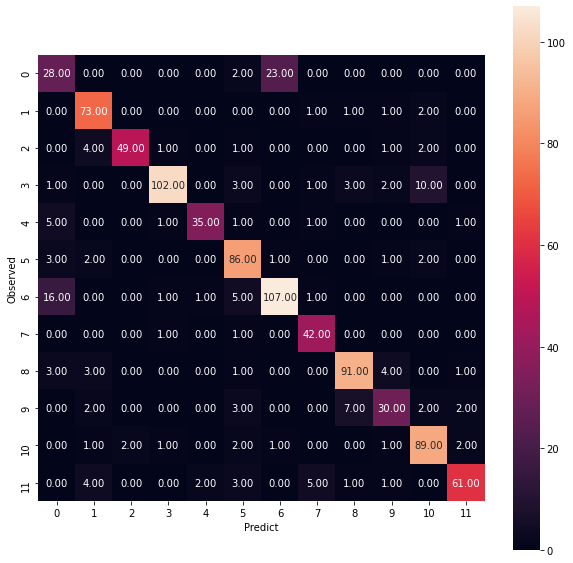

In [74]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(yts,y_pred),annot=True, fmt=".2f", xticklabels=range(12),yticklabels=range(12),square=True)
plt.ylabel("Observed")
plt.xlabel("Predict")